# Отчет по лабораторной работе №1 по визуализации данных

## 1) Текстовое описание набора данных

В качестве набора данных использован набор данных по информации о населении, регионе, размере территории, младенческой смертности и т.д. - https://www.kaggle.com/fernandol/countries-of-the-world/version/1

Все эти наборы данных состоят из данных правительства США за 1970-2017. При создании визуализаций, связанных со странами, иногда интересно сгруппировать их по таким атрибутам, как регион, или взвесить их важность по численности населения, ВВП или другим переменным.

Датасет состоит из 20 колонок:
* Country – страна
* Region – регион
* Population – количество жителей
* Area – площадь (кв.миля)
* Pop. Density – плотность населения (на 1 кв.милю)
* Coastline – соотношение берег/площадь
* Net migration – сетевая миграция
* Infant mortality – младенческая смертность (на 1000 рождений)
* GPD – ВВП (doll. на душу населения)
* Literacy – грамотность (%)
* Phones – телефоны (на 1000)
* Arable – пашня (%)
* Crops – культура (%)
* Other – другое (%)
* Climate – климатический пояс 
* Birthrate – уровень рождаемости
* Deathrate – уровень смертности
* Agriculture – сельсткое хозяйство
* Industry – промышленность
* Service – оказание услуг

### Импорт библиотек

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

Загрузка файла датасета происходит с помощью библиотеки Pandas.
Данные представлены в формате CSV.

In [47]:
data = pd.read_csv('countries of the world.csv', sep=",", decimal=',')

## 2) Основные характеристики датасета

In [48]:
# Первые 5 строк
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [49]:
# Размер датасета
data.shape

(227, 20)

In [50]:
rows = data.shape[0]
print('Всего строк: {}'.format(rows))

Всего строк: 227


In [51]:
# Список колонок
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [52]:
# Список колонок с типами данных
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [53]:
# Наличие пустых значений
def empty():
    for col in data.columns:
        null_col = data[data[col].isnull()].shape[0]
        print('{} - {}'.format(col, null_col))
        
print('Before:')        
empty()
# Удаление пустых строк
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('\nAfter:')
empty()

Before:
Country - 0
Region - 0
Population - 0
Area (sq. mi.) - 0
Pop. Density (per sq. mi.) - 0
Coastline (coast/area ratio) - 0
Net migration - 3
Infant mortality (per 1000 births) - 3
GDP ($ per capita) - 1
Literacy (%) - 18
Phones (per 1000) - 4
Arable (%) - 2
Crops (%) - 2
Other (%) - 2
Climate - 22
Birthrate - 3
Deathrate - 4
Agriculture - 15
Industry - 16
Service - 15

After:
Country - 0
Region - 0
Population - 0
Area (sq. mi.) - 0
Pop. Density (per sq. mi.) - 0
Coastline (coast/area ratio) - 0
Net migration - 0
Infant mortality (per 1000 births) - 0
GDP ($ per capita) - 0
Literacy (%) - 0
Phones (per 1000) - 0
Arable (%) - 0
Crops (%) - 0
Other (%) - 0
Climate - 0
Birthrate - 0
Deathrate - 0
Agriculture - 0
Industry - 0
Service - 0


In [54]:
# Основные статистические характеристки набора данных
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [55]:
# Уникальные значения для сетевой миграции
data['Net migration'].unique()

array([ 2.306e+01, -4.930e+00, -3.900e-01,  1.076e+01, -6.150e+00,
        6.100e-01, -6.470e+00,  0.000e+00,  3.980e+00,  2.000e+00,
       -4.900e+00, -2.200e+00,  1.050e+00, -7.100e-01, -3.100e-01,
        2.540e+00,  1.230e+00,  2.490e+00, -1.320e+00, -3.000e-02,
        1.001e+01,  3.590e+00, -4.580e+00, -1.800e+00, -6.000e-02,
       -1.207e+01,  1.875e+01, -1.100e-01, -4.000e-01, -1.700e-01,
        5.100e-01, -7.000e-02, -1.580e+00,  9.700e-01,  2.480e+00,
       -1.387e+01, -3.220e+00, -8.580e+00, -2.200e-01, -3.740e+00,
       -3.160e+00, -3.140e+00,  9.500e-01,  6.600e-01,  6.270e+00,
        2.940e+00,  1.570e+00, -4.700e+00,  2.180e+00, -6.400e-01,
        2.350e+00, -1.392e+01, -1.500e-01, -1.670e+00, -3.060e+00,
       -1.570e+00, -2.070e+00, -3.400e+00, -1.990e+00,  5.240e+00,
        8.600e-01,  2.380e+00, -8.400e-01,  4.990e+00,  6.800e-01,
       -4.920e+00,  6.590e+00, -3.350e+00, -1.000e-01,  1.418e+01,
       -2.450e+00, -2.230e+00, -7.400e-01,  4.850e+00,  4.860e

# 3) Визуальное исследование датасета

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных (уровень рождаемости от ВВП) и визуально обнаружить наличие зависимости (почти линейная).

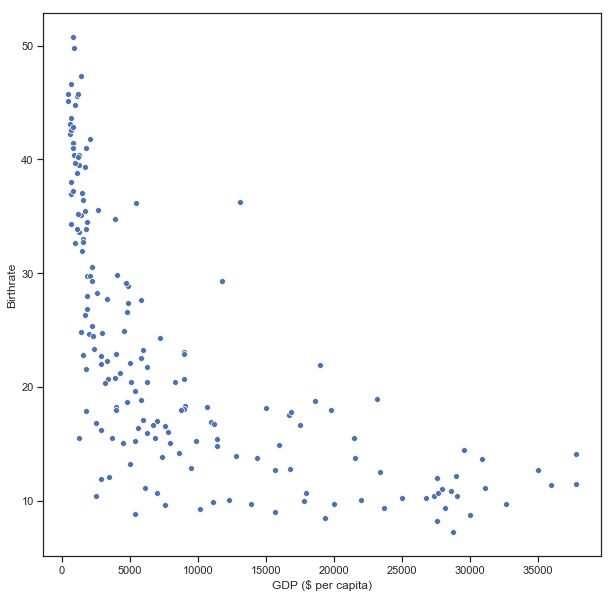

In [56]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GDP ($ per capita)', y='Birthrate', data=data)

Посмотрим насколько на эту зависимость влияет климат.

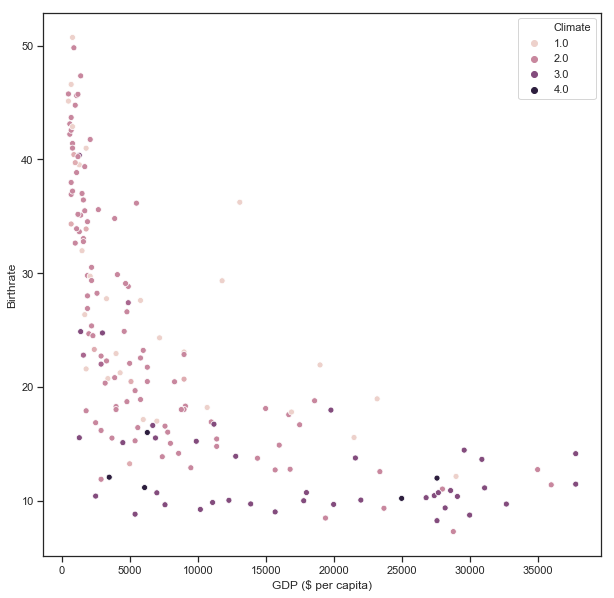

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GDP ($ per capita)', y='Birthrate', data=data, hue='Climate')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных (младенческая смертность (на 1000 рождений)).

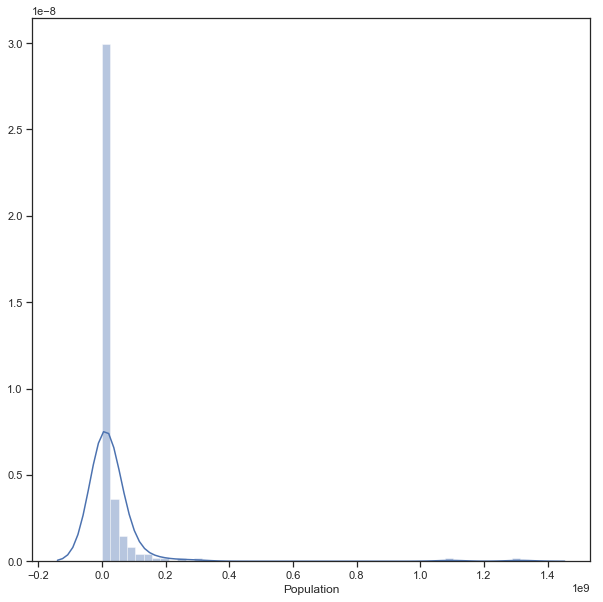

In [58]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Population'])

### Jointplot

Комбинация гистограмм и диаграмм рассеивания.

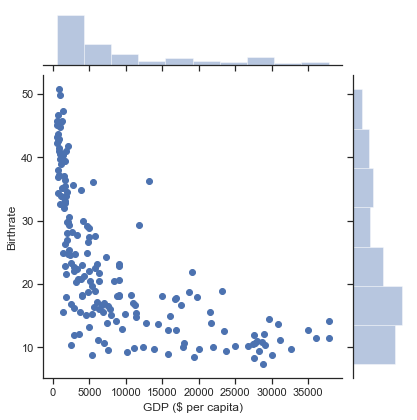

In [59]:
sns.jointplot(x='GDP ($ per capita)', y='Birthrate', data=data)

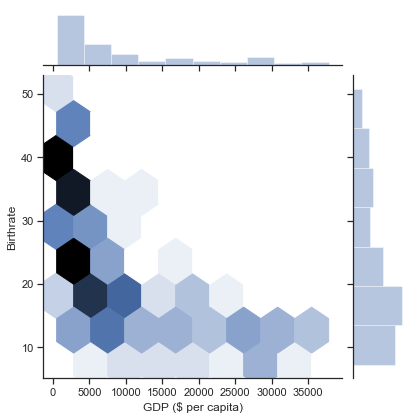

In [60]:
sns.jointplot(x='GDP ($ per capita)', y='Birthrate', data=data, kind="hex")

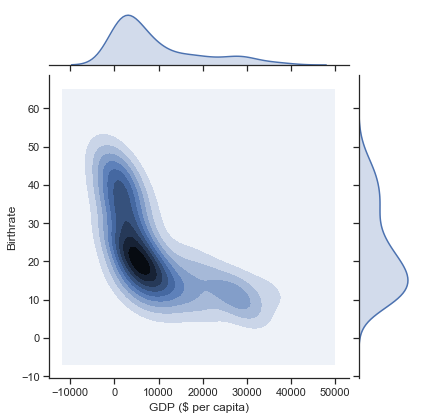

In [61]:
sns.jointplot(x='GDP ($ per capita)', y='Birthrate', data=data, kind="kde")

### Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. 
В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

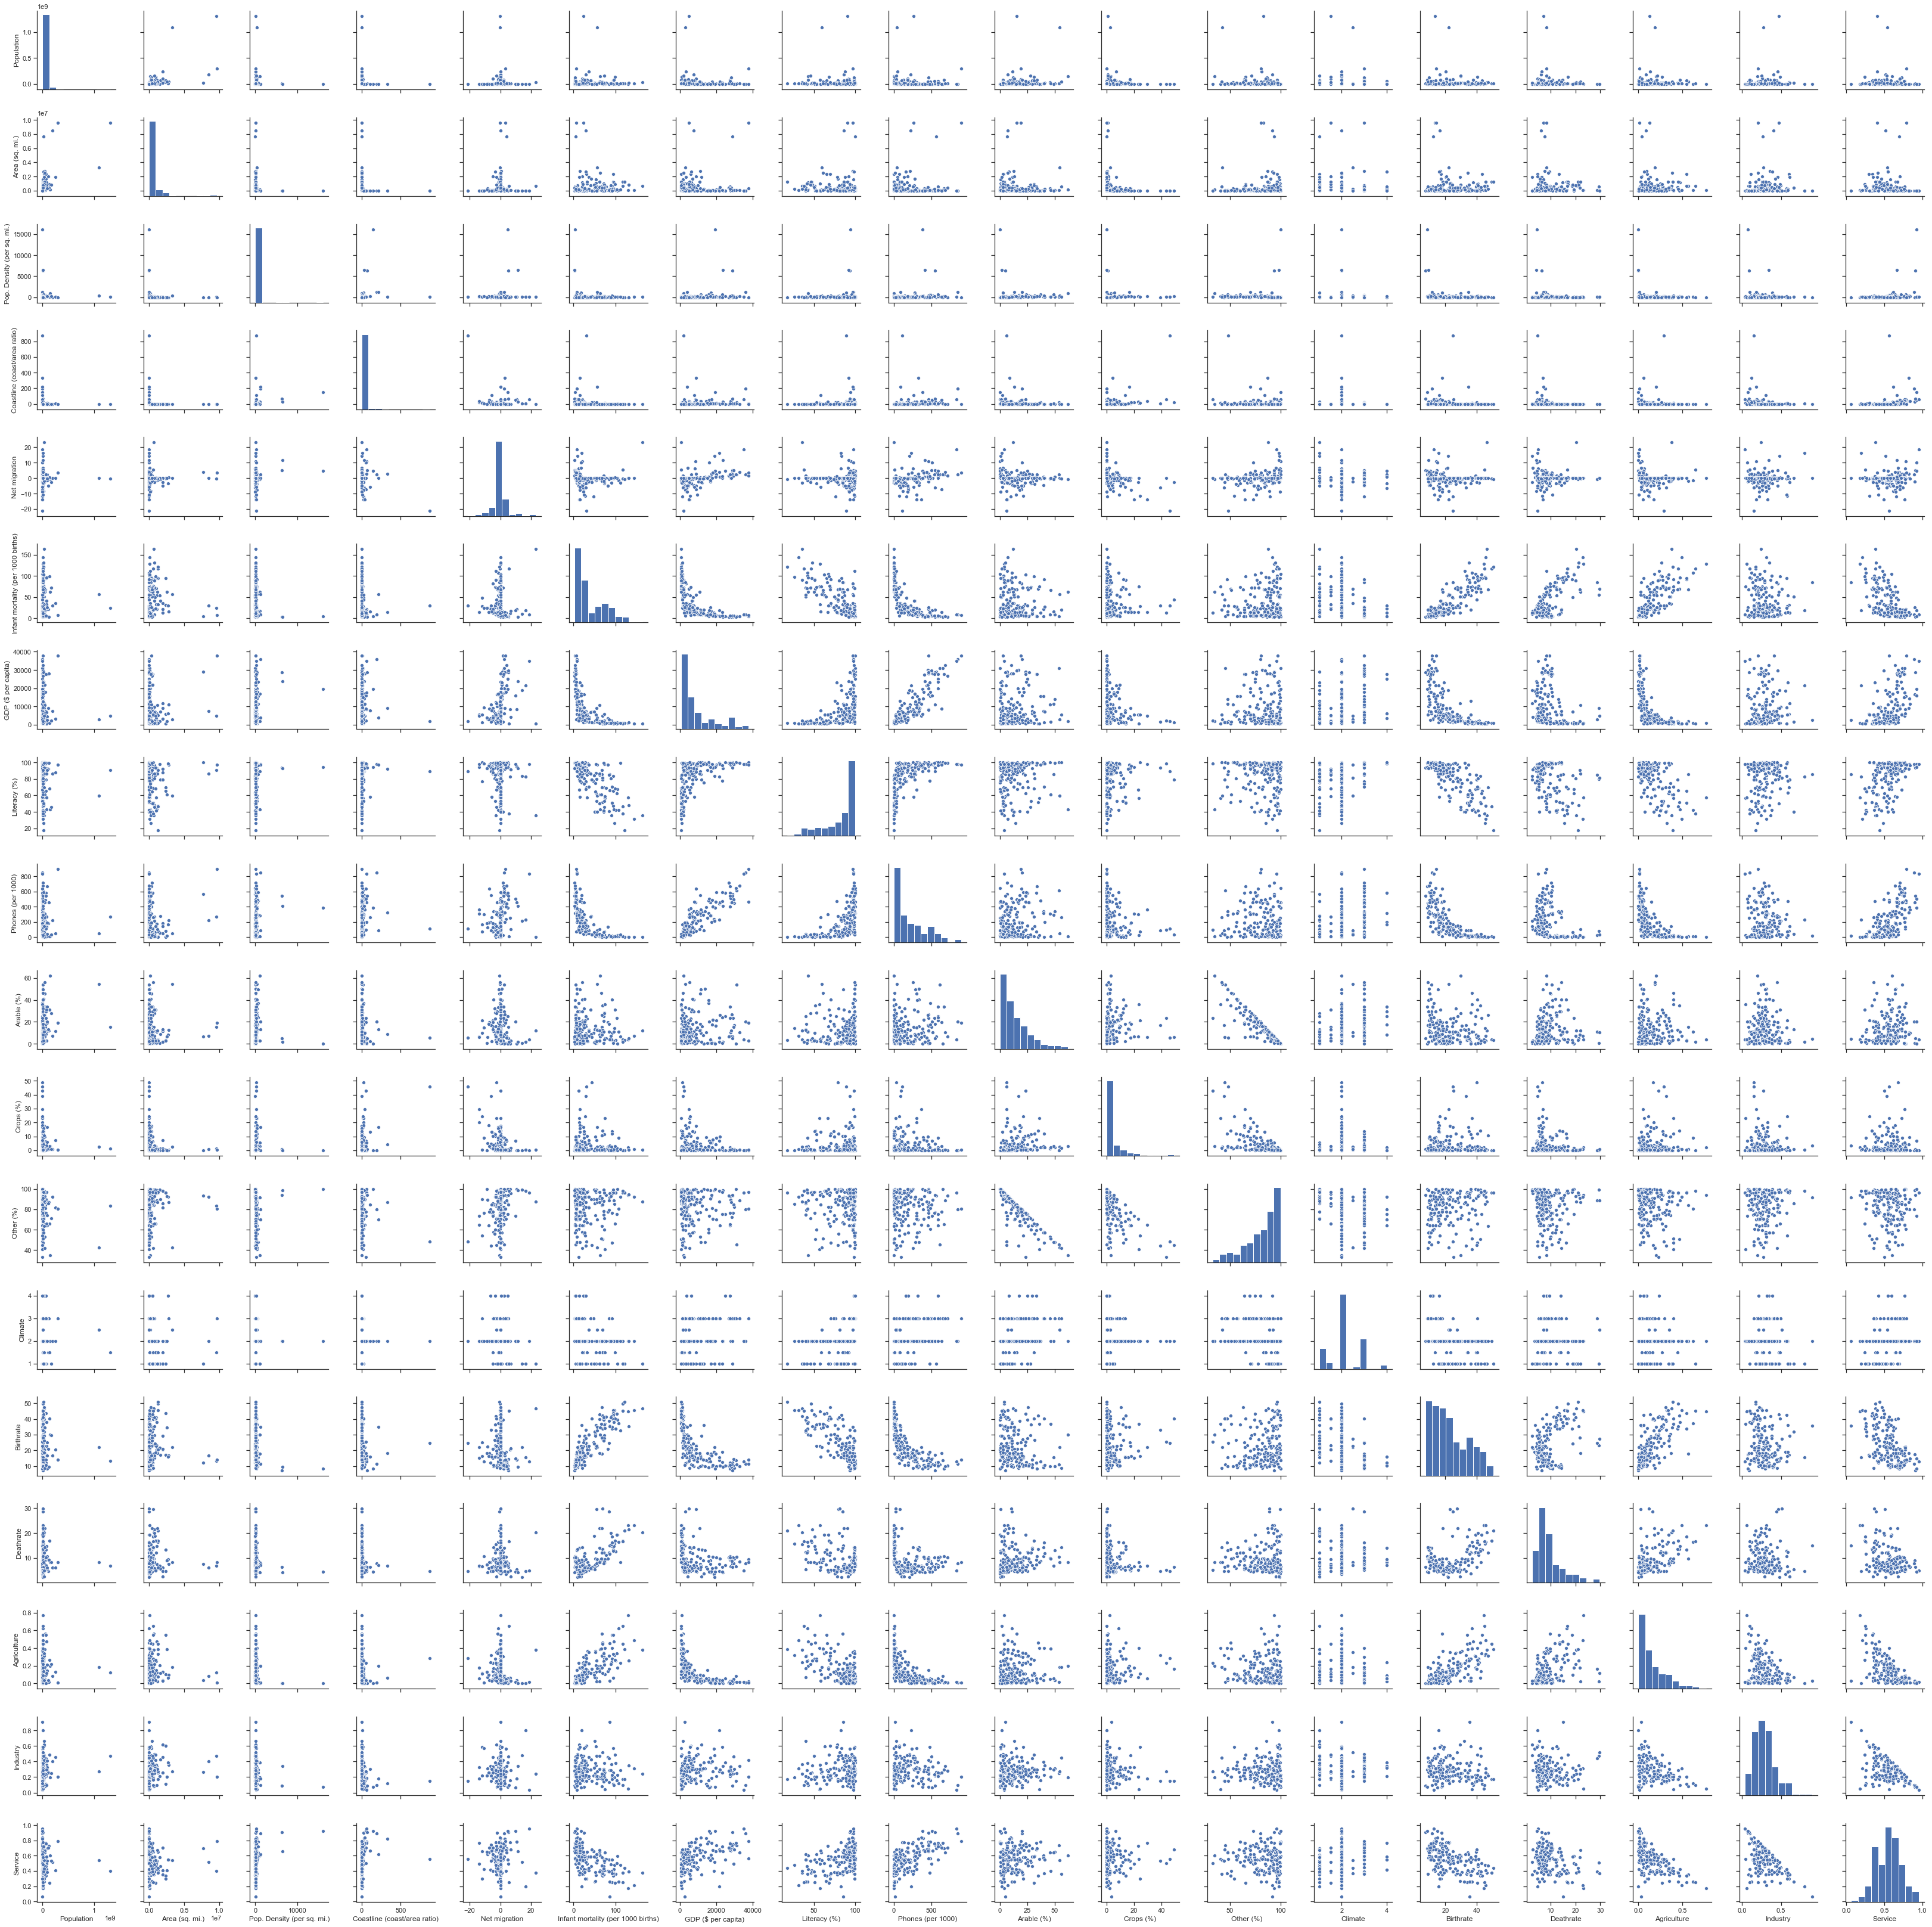

In [62]:
sns.pairplot(data)

### Ящик с усами

Отображает одномерное распределение вероятности.

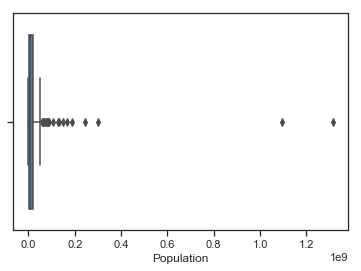

In [63]:
sns.boxplot(x=data['Population'])

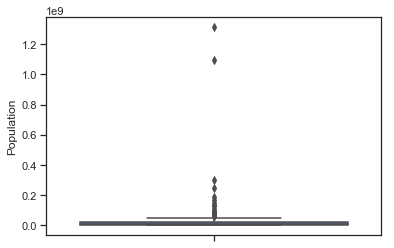

In [64]:
# По вертикали
sns.boxplot(y=data['Population'])

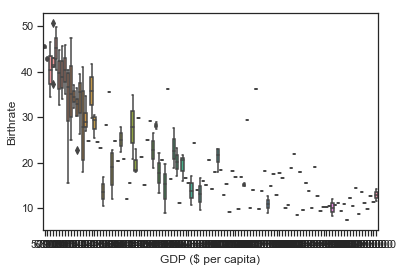

In [65]:
# Распределение параметра Birthrate сгруппированные по GDP ($ per capita).
sns.boxplot(x='GDP ($ per capita)', y='Birthrate', data=data)

### Violin plot

По краям отображаются распределения плотности

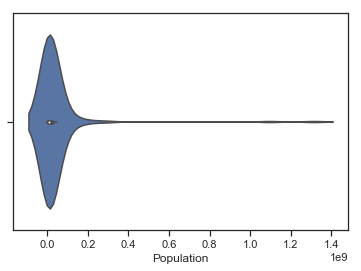

In [66]:
sns.violinplot(x=data['Population'])

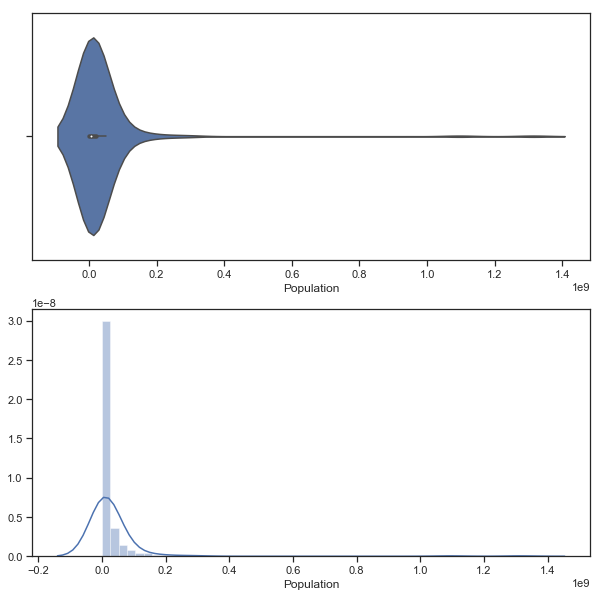

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Population'])
sns.distplot(data['Population'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

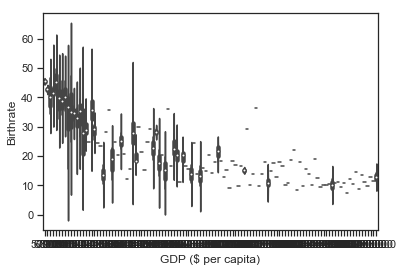

In [68]:
# Распределение параметра GDP ($ per capita) сгруппированные по Birthrate.
sns.violinplot(x='GDP ($ per capita)', y='Birthrate', data=data)

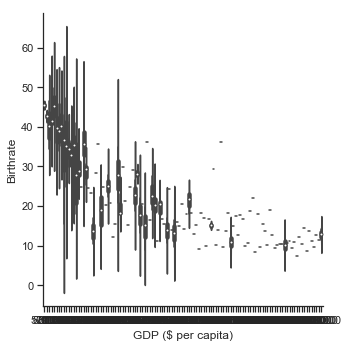

In [69]:
sns.catplot(y='Birthrate', x='GDP ($ per capita)', data=data, kind="violin", split=True)

## 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1) Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком ("Birthrate"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели.

2) Понять какие нецелевые признаки линейно зависимы между собой.

In [70]:
data.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.610850,-0.019010,-0.054617,0.010332,0.002438,-0.033618,-0.038162,-0.003942,0.206667,-0.062567,-0.137345,-0.018471,-0.064719,-0.050578,-0.007401,0.092468,-0.070320
Area (sq. mi.),0.610850,1.000000,-0.069010,-0.088162,0.052730,0.002924,0.068356,0.000682,0.077864,-0.053747,-0.160433,0.124528,-0.094852,-0.037473,-0.024266,-0.017035,0.103225,-0.070204
Pop. Density (per sq. mi.),-0.019010,-0.069010,1.000000,0.164036,0.161705,-0.143214,0.190122,0.086090,0.157072,-0.059223,-0.036580,0.066753,-0.012370,-0.174565,-0.130624,-0.144315,-0.145370,0.255477
Coastline (coast/area ratio),-0.054617,-0.088162,0.164036,1.000000,-0.241629,-0.105956,0.035815,0.099605,0.098367,-0.077800,0.399358,-0.137085,-0.027063,-0.063464,-0.148592,-0.032327,-0.188972,0.190004
Net migration,0.010332,0.052730,0.161705,-0.241629,1.000000,0.013053,0.378790,-0.053788,0.232446,-0.065846,-0.405355,0.257420,-0.070413,-0.035102,0.042805,-0.096617,-0.004402,0.091498
Infant mortality (per 1000 births),0.002438,0.002924,-0.143214,-0.105956,0.013053,1.000000,-0.639090,-0.761224,-0.699199,-0.123033,-0.095712,0.148600,-0.366672,0.862113,0.665729,0.758537,-0.085310,-0.618259
GDP ($ per capita),-0.033618,0.068356,0.190122,0.035815,0.378790,-0.639090,1.000000,0.522880,0.883520,0.046465,-0.207844,0.066445,0.360567,-0.658795,-0.247562,-0.616919,0.032855,0.536551
Literacy (%),-0.038162,0.000682,0.086090,0.099605,-0.053788,-0.761224,0.522880,1.000000,0.592042,0.086519,0.060741,-0.101167,0.395194,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Phones (per 1000),-0.003942,0.077864,0.157072,0.098367,0.232446,-0.699199,0.883520,0.592042,1.000000,0.124116,-0.124819,-0.038643,0.410691,-0.732985,-0.317530,-0.631578,-0.084247,0.649638
Arable (%),0.206667,-0.053747,-0.059223,-0.077800,-0.065846,-0.123033,0.046465,0.086519,0.124116,1.000000,0.098265,-0.866058,0.392914,-0.198438,0.047770,-0.018610,-0.073380,0.081982


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

* Уровень рождаемости наиболее сильно коррелирует с младенческой смертностью (на 1000 рождений) (0.845764) и сельским хозяйством (0.678207). Эти признаки обязательно следует оставить в модели.
* Уровень рождаемости отчасти коррелирует с уровнем смертности (0.395302). Этот признак стоит также оставить в модели.
* Уровень рождаемости слабо коррелирует с культурой (%) (0.120687) и другими параметрами (0.088586). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Построение корреляционной матрицы на основе коэффициентов корреляции Пирсона, Кендалла и Спирмена.

In [71]:
data.corr(method='pearson')

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.610850,-0.019010,-0.054617,0.010332,0.002438,-0.033618,-0.038162,-0.003942,0.206667,-0.062567,-0.137345,-0.018471,-0.064719,-0.050578,-0.007401,0.092468,-0.070320
Area (sq. mi.),0.610850,1.000000,-0.069010,-0.088162,0.052730,0.002924,0.068356,0.000682,0.077864,-0.053747,-0.160433,0.124528,-0.094852,-0.037473,-0.024266,-0.017035,0.103225,-0.070204
Pop. Density (per sq. mi.),-0.019010,-0.069010,1.000000,0.164036,0.161705,-0.143214,0.190122,0.086090,0.157072,-0.059223,-0.036580,0.066753,-0.012370,-0.174565,-0.130624,-0.144315,-0.145370,0.255477
Coastline (coast/area ratio),-0.054617,-0.088162,0.164036,1.000000,-0.241629,-0.105956,0.035815,0.099605,0.098367,-0.077800,0.399358,-0.137085,-0.027063,-0.063464,-0.148592,-0.032327,-0.188972,0.190004
Net migration,0.010332,0.052730,0.161705,-0.241629,1.000000,0.013053,0.378790,-0.053788,0.232446,-0.065846,-0.405355,0.257420,-0.070413,-0.035102,0.042805,-0.096617,-0.004402,0.091498
Infant mortality (per 1000 births),0.002438,0.002924,-0.143214,-0.105956,0.013053,1.000000,-0.639090,-0.761224,-0.699199,-0.123033,-0.095712,0.148600,-0.366672,0.862113,0.665729,0.758537,-0.085310,-0.618259
GDP ($ per capita),-0.033618,0.068356,0.190122,0.035815,0.378790,-0.639090,1.000000,0.522880,0.883520,0.046465,-0.207844,0.066445,0.360567,-0.658795,-0.247562,-0.616919,0.032855,0.536551
Literacy (%),-0.038162,0.000682,0.086090,0.099605,-0.053788,-0.761224,0.522880,1.000000,0.592042,0.086519,0.060741,-0.101167,0.395194,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Phones (per 1000),-0.003942,0.077864,0.157072,0.098367,0.232446,-0.699199,0.883520,0.592042,1.000000,0.124116,-0.124819,-0.038643,0.410691,-0.732985,-0.317530,-0.631578,-0.084247,0.649638
Arable (%),0.206667,-0.053747,-0.059223,-0.077800,-0.065846,-0.123033,0.046465,0.086519,0.124116,1.000000,0.098265,-0.866058,0.392914,-0.198438,0.047770,-0.018610,-0.073380,0.081982


In [72]:
data.corr(method='kendall')

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.609566,-0.000879,-0.350371,0.020548,0.104711,-0.096495,-0.096190,-0.150615,0.204508,0.002205,-0.107355,0.006608,0.045009,0.128046,0.114928,0.155438,-0.196827
Area (sq. mi.),0.609566,1.000000,-0.391399,-0.494849,0.002805,0.208418,-0.162883,-0.131616,-0.239515,-0.065239,-0.226123,0.167624,-0.110455,0.151099,0.188458,0.191294,0.176062,-0.277141
Pop. Density (per sq. mi.),-0.000879,-0.391399,1.000000,0.302599,0.006003,-0.224350,0.148114,0.094761,0.221169,0.415387,0.351894,-0.468006,0.153128,-0.218880,-0.139317,-0.173153,-0.057925,0.199447
Coastline (coast/area ratio),-0.350371,-0.494849,0.302599,1.000000,0.000599,-0.349187,0.287507,0.176404,0.345505,-0.022998,0.241243,-0.102226,0.058593,-0.248177,-0.327845,-0.307737,-0.150758,0.376810
Net migration,0.020548,0.002805,0.006003,0.000599,1.000000,-0.161402,0.225566,0.048999,0.136689,-0.082546,-0.258303,0.161412,0.069494,-0.096355,0.033610,-0.196053,-0.018754,0.102796
Infant mortality (per 1000 births),0.104711,0.208418,-0.224350,-0.349187,-0.161402,1.000000,-0.705327,-0.551918,-0.712398,-0.083142,-0.010838,0.086834,-0.342567,0.672254,0.310002,0.593754,-0.057288,-0.467413
GDP ($ per capita),-0.096495,-0.162883,0.148114,0.287507,0.225566,-0.705327,1.000000,0.493359,0.723852,0.021926,-0.088257,0.000315,0.265482,-0.641369,-0.250671,-0.679186,0.134457,0.427104
Literacy (%),-0.096190,-0.131616,0.094761,0.176404,0.048999,-0.551918,0.493359,1.000000,0.535389,0.144268,-0.020373,-0.120856,0.408439,-0.601260,-0.069368,-0.395566,0.077540,0.322543
Phones (per 1000),-0.150615,-0.239515,0.221169,0.345505,0.136689,-0.712398,0.723852,0.535389,1.000000,0.080701,-0.029681,-0.073718,0.294758,-0.673134,-0.262232,-0.608847,0.045407,0.488765
Arable (%),0.204508,-0.065239,0.415387,-0.022998,-0.082546,-0.083142,0.021926,0.144268,0.080701,1.000000,0.299491,-0.796496,0.336347,-0.171994,0.137257,0.030267,-0.029437,0.062361


In [73]:
data.corr(method='spearman')

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.795204,-0.023268,-0.503016,0.030561,0.168955,-0.152863,-0.140565,-0.223394,0.302188,-0.009519,-0.148898,0.006739,0.057770,0.199848,0.177593,0.243111,-0.290119
Area (sq. mi.),0.795204,1.000000,-0.557393,-0.649206,0.005283,0.326327,-0.244485,-0.199954,-0.350405,-0.100702,-0.310975,0.248292,-0.158786,0.230564,0.279218,0.282596,0.254111,-0.396463
Pop. Density (per sq. mi.),-0.023268,-0.557393,1.000000,0.441155,0.006185,-0.321955,0.216487,0.144197,0.320258,0.570631,0.463102,-0.628396,0.203230,-0.325656,-0.214726,-0.256509,-0.081924,0.292864
Coastline (coast/area ratio),-0.503016,-0.649206,0.441155,1.000000,0.004944,-0.497061,0.411947,0.242277,0.491441,-0.030193,0.322760,-0.153607,0.080474,-0.357666,-0.484122,-0.436980,-0.225167,0.533687
Net migration,0.030561,0.005283,0.006185,0.004944,1.000000,-0.279791,0.345671,0.089986,0.237618,-0.115199,-0.363960,0.231869,0.088735,-0.163307,0.052162,-0.298429,-0.028733,0.151359
Infant mortality (per 1000 births),0.168955,0.326327,-0.321955,-0.497061,-0.279791,1.000000,-0.883782,-0.730086,-0.895244,-0.119394,-0.007476,0.131096,-0.445971,0.861648,0.451503,0.789061,-0.088053,-0.667724
GDP ($ per capita),-0.152863,-0.244485,0.216487,0.411947,0.345671,-0.883782,1.000000,0.674936,0.904129,0.032803,-0.132024,0.002233,0.347669,-0.829505,-0.362430,-0.863334,0.190807,0.600989
Literacy (%),-0.140565,-0.199954,0.144197,0.242277,0.089986,-0.730086,0.674936,1.000000,0.738922,0.206588,-0.033601,-0.179432,0.512245,-0.794650,-0.169760,-0.562316,0.119405,0.473232
Phones (per 1000),-0.223394,-0.350405,0.320258,0.491441,0.237618,-0.895244,0.904129,0.738922,1.000000,0.123371,-0.045839,-0.112715,0.394826,-0.865237,-0.399334,-0.802600,0.076780,0.680298
Arable (%),0.302188,-0.100702,0.570631,-0.030193,-0.115199,-0.119394,0.032803,0.206588,0.123371,1.000000,0.438073,-0.911240,0.429039,-0.247097,0.193958,0.048188,-0.045884,0.088055


Для визуализации корреляционной матрицы использована "тепловая карта" heatmap, которая показывает степень корреляции различными цветами.

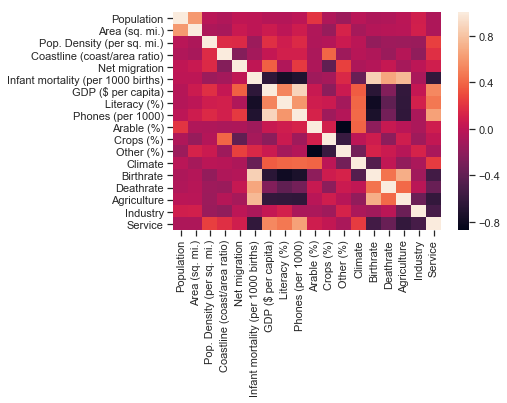

In [74]:
sns.heatmap(data.corr())

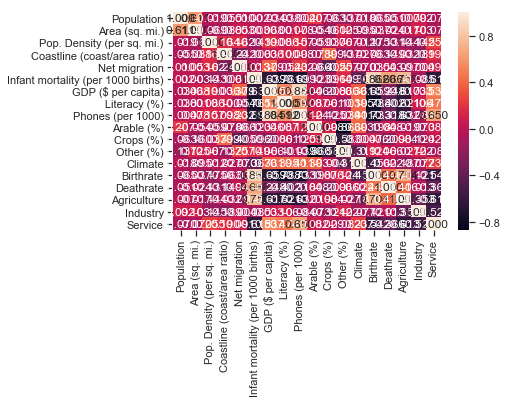

In [75]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

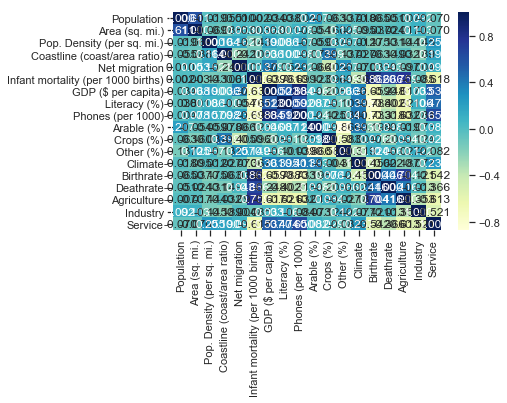

In [76]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

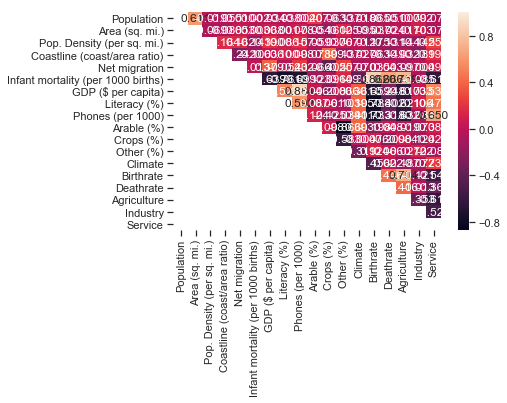

In [77]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# Верхняя часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

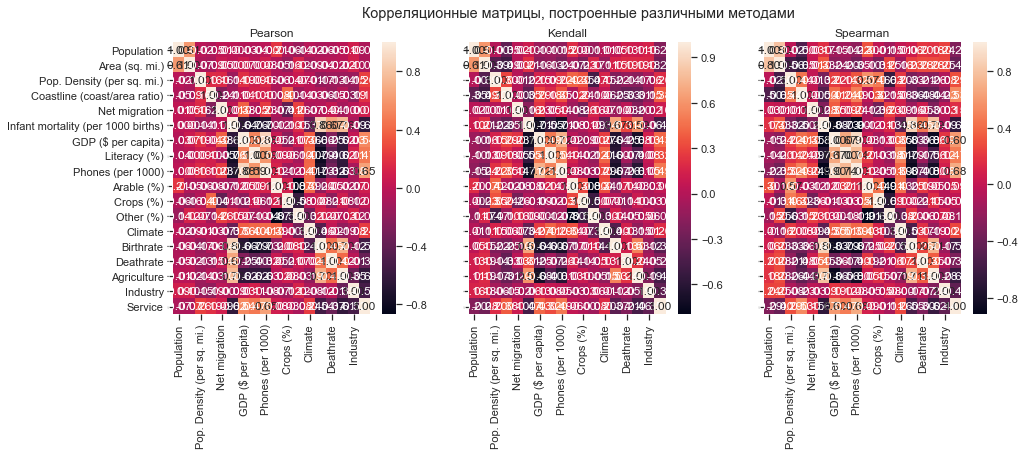

In [78]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

Здесь тепловая карта помогает определить значимую корреляцию между признаками Birthrate и Infant mortality, следовательно только один из этих признаков можно включать в модель.